## Imports

In [50]:
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format='retina'

# Date imports
from datetime import date, datetime, timedelta
import xlrd
import openpyxl

In [51]:
#!pip install openpyxl

## 1. Load dataset

In [52]:
#xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final2.xlsx')
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final2.xlsx', engine='openpyxl')
transactions = pd.read_excel(xls, 'Transactions')
cust_demograph = pd.read_excel(xls, 'CustomerDemographic')
cust_address = pd.read_excel(xls, 'CustomerAddress')


In [53]:
cust_demograph = cust_demograph.loc[:, ~cust_demograph.columns.str.contains('^Unnamed')]
cust_address = cust_address.loc[:, ~cust_address.columns.str.contains('^Unnamed')]

## 2. Data Quality Assessment

#### 2.a  Transactions

In [54]:
transactions.head(20)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
transactions.shape

(20000, 256)

In [56]:
transactions.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date    datetime64[ns]
online_order               float64
                         ...      
Unnamed: 251               float64
Unnamed: 252               float64
Unnamed: 253               float64
Unnamed: 254               float64
Unnamed: 255               float64
Length: 256, dtype: object

In [57]:
transactions.isna().sum()

transaction_id          0
product_id              0
customer_id             0
transaction_date        0
online_order          360
                    ...  
Unnamed: 251        20000
Unnamed: 252        20000
Unnamed: 253        20000
Unnamed: 254        20000
Unnamed: 255        20000
Length: 256, dtype: int64

In [58]:
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 15,Unnamed: 16,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [60]:
transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [61]:
for each in ['product_line','product_class','product_size']:
    print(f'Unique values for {each}:')
    print(transactions[each].value_counts())
    print('-----------------------------------')

Unique values for product_line:
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64
-----------------------------------
Unique values for product_class:
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64
-----------------------------------
Unique values for product_size:
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64
-----------------------------------


In [62]:
transactions["customer_id"].is_unique

False

#### 2.b  Customer Demographic

In [63]:
cust_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [64]:
cust_demograph.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [65]:
cust_demograph.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [66]:
cust_demograph.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [67]:
for each in ['gender','job_title','job_industry_category','wealth_segment','default','deceased_indicator','gender']:
    print(f'Unique values for {each}:')
    print(cust_demograph[each].value_counts())
    print('-----------------------------------')
    

Unique values for gender:
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64
-----------------------------------
Unique values for job_title:
Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Account Representative II                4
Health Coach I                           3
Research Assistant III                   3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64
-----------------------------------
Unique values for job_industry_category:
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture      

In [68]:
cust_demograph['job_title'].is_unique

False

#### 2.c  Customer Address

In [69]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
cust_address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [71]:
cust_address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [72]:
cust_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [73]:
for each in ['address','postcode','state']:
    print(f'Unique values for {each}:')
    print(cust_address[each].value_counts())
    print('-----------------------------------')

Unique values for address:
64 Macpherson Junction     2
3 Talisman Place           2
3 Mariners Cove Terrace    2
0 Grasskamp Pass           1
835 Thackeray Place        1
                          ..
4 5th Point                1
12764 Raven Plaza          1
2 Hoffman Way              1
2942 Swallow Trail         1
70875 Hudson Point         1
Name: address, Length: 3996, dtype: int64
-----------------------------------
Unique values for postcode:
2170    31
2145    30
2155    30
2153    29
3977    26
        ..
3331     1
3036     1
3321     1
3305     1
2143     1
Name: postcode, Length: 873, dtype: int64
-----------------------------------
Unique values for state:
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64
-----------------------------------


## 3. Data Insights

### 3.1  Clean Transaction Dataset

In [74]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
transactions.shape

(20000, 256)

In [76]:
transactions.isna().sum()

transaction_id          0
product_id              0
customer_id             0
transaction_date        0
online_order          360
                    ...  
Unnamed: 251        20000
Unnamed: 252        20000
Unnamed: 253        20000
Unnamed: 254        20000
Unnamed: 255        20000
Length: 256, dtype: int64

In [77]:
transactions.columns[:20]

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [78]:
transactions.drop(columns=['Unnamed: 13','Unnamed: 14'], inplace=True)
trans1 = transactions.loc[:, ~transactions.columns.str.contains('^Unnamed')]
#trans1 = transactions.dropna()
trans1 = trans1.dropna()
trans1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [79]:
trans1.shape

(19445, 13)

In [80]:
trans1['transaction_id'].is_unique

True

In [81]:
trans1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


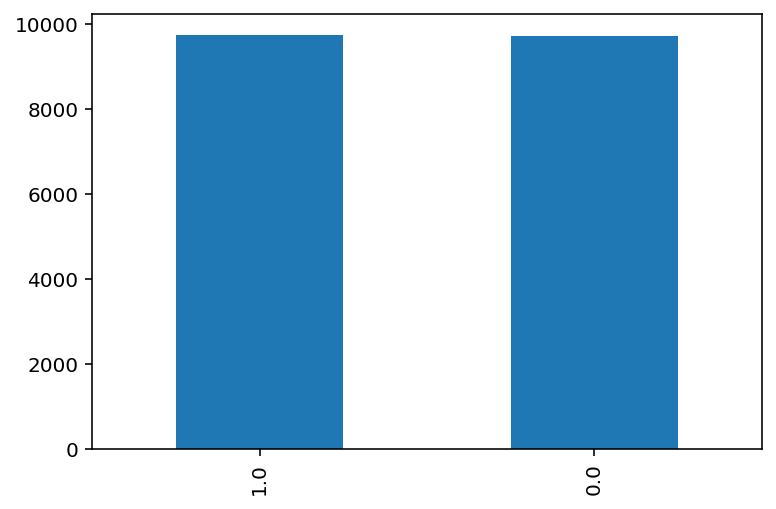

In [82]:
# Proportion of Orders by online or not

trans1['online_order'].value_counts().plot(kind='bar');

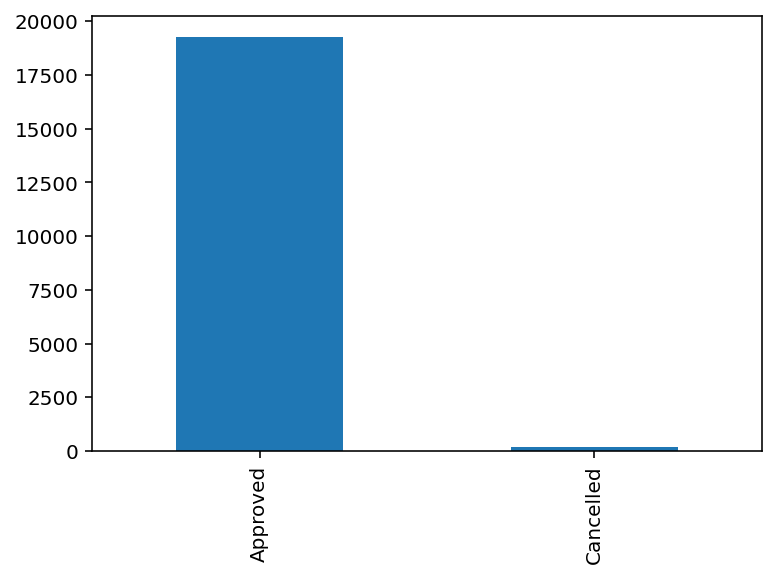

In [83]:
# Proportion of Orders by Order status

trans1['order_status'].value_counts().plot(kind='bar');

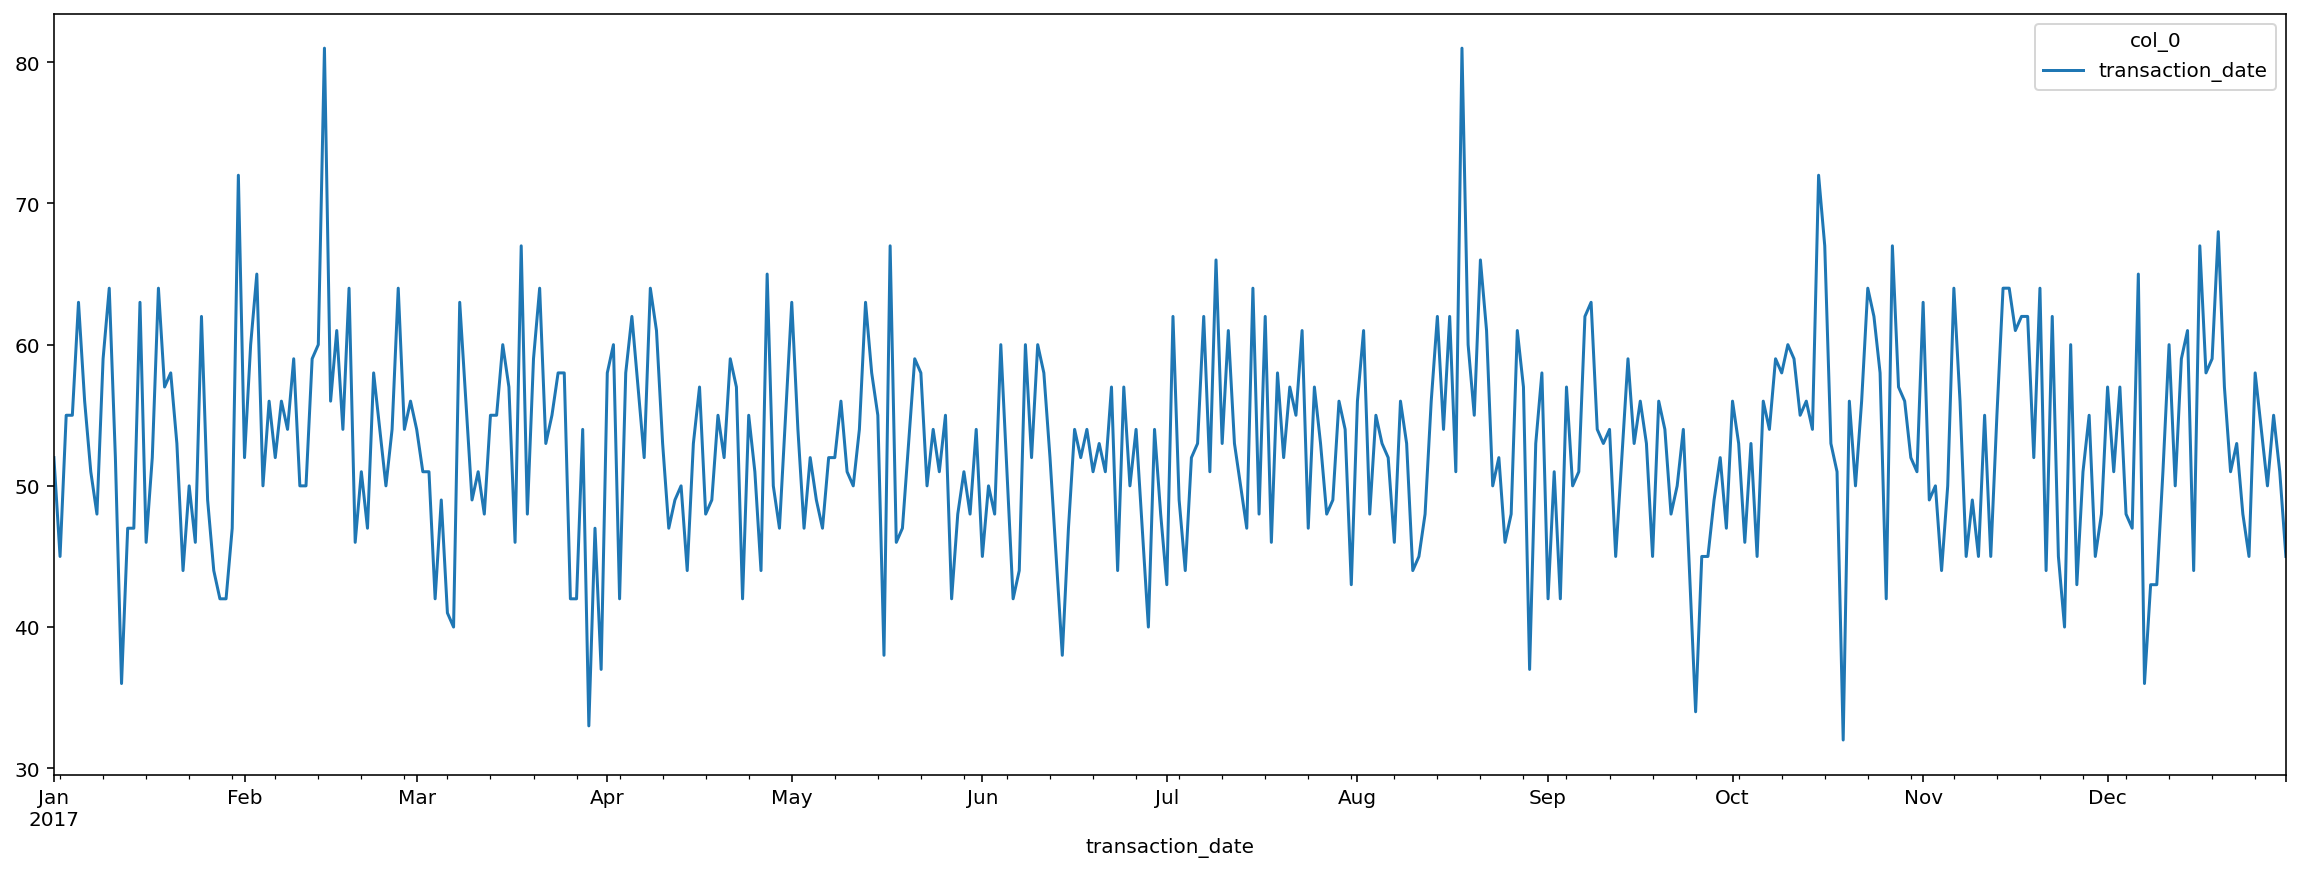

In [84]:
dates_count = trans1.loc[trans1['order_status'] == 'Approved']['transaction_date']
pd.crosstab(dates_count, columns='transaction_date').plot(kind='line', figsize=(20,7));
#sns.lineplot(x='transaction_date', 
            # y=dates_count['transaction_date'].value_counts(), 
             #data=dates_count)

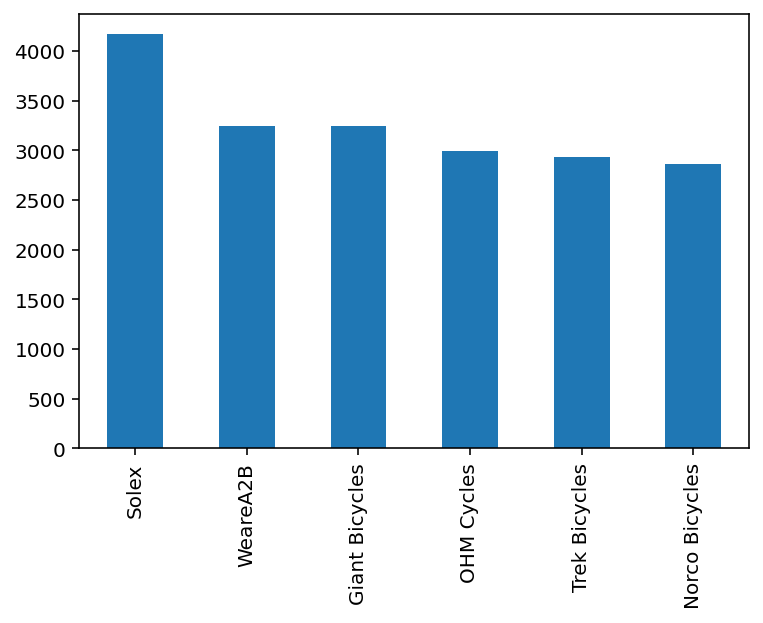

In [85]:
# By brand
trans1['brand'].value_counts().plot(kind='bar');

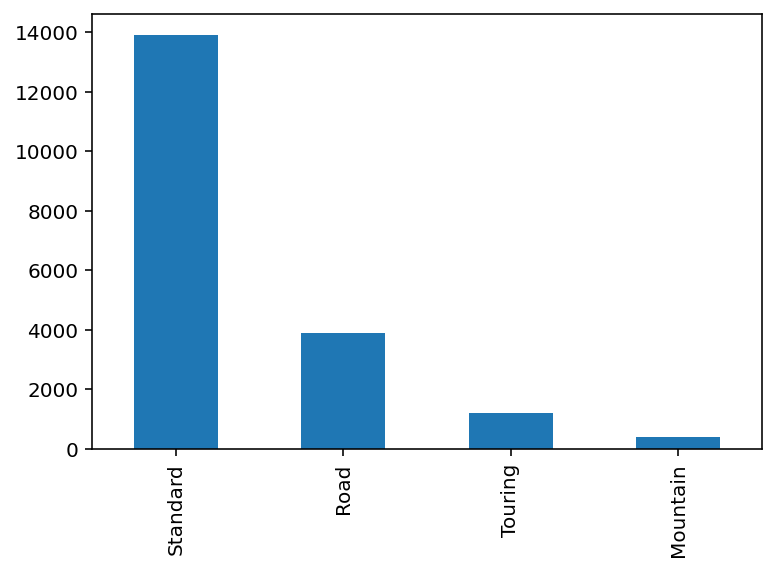

In [86]:
# By productline
trans1['product_line'].value_counts().plot(kind='bar');

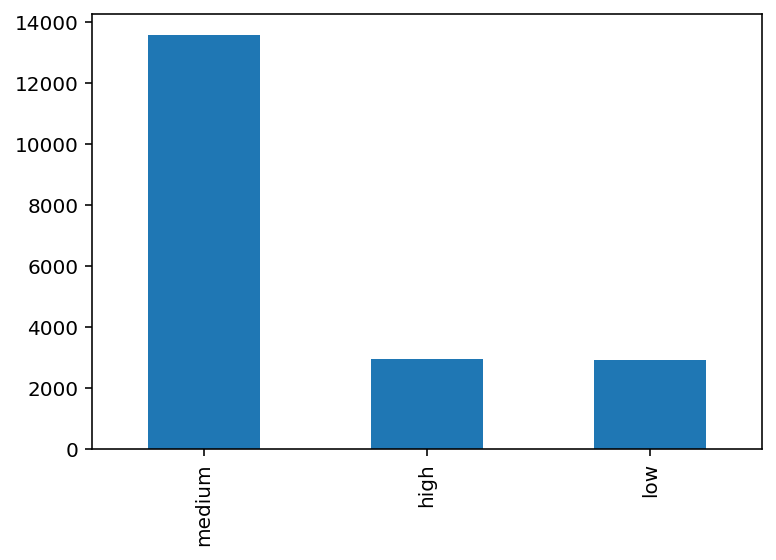

In [87]:
# By product class
trans1['product_class'].value_counts().plot(kind='bar');

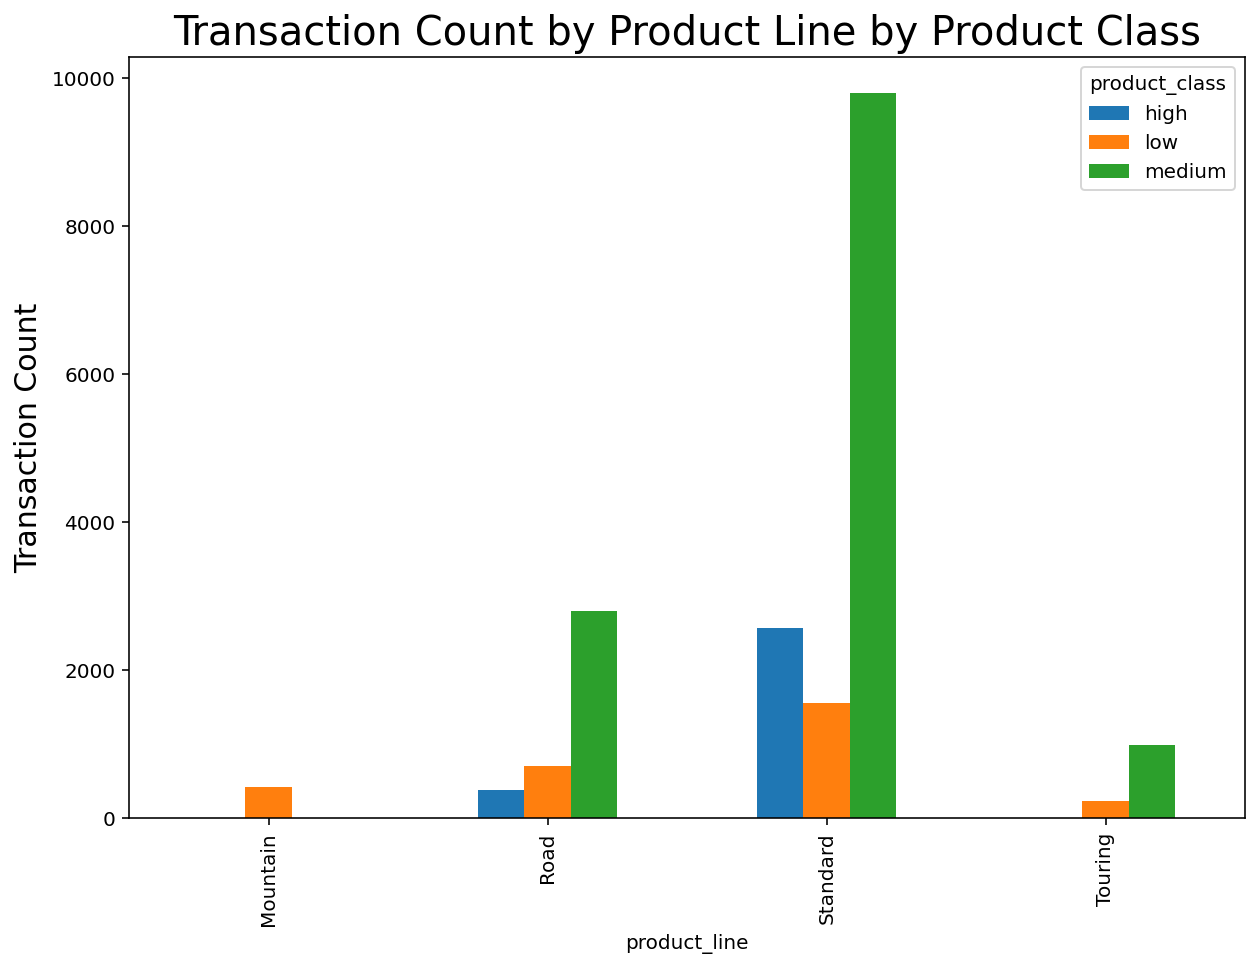

In [88]:

trans1.groupby(['product_line','product_class']).count()['transaction_id'].unstack().plot.bar(figsize=(10,7));
plt.ylabel('Transaction Count', size=15)
plt.title('Transaction Count by Product Line by Product Class', size=20);

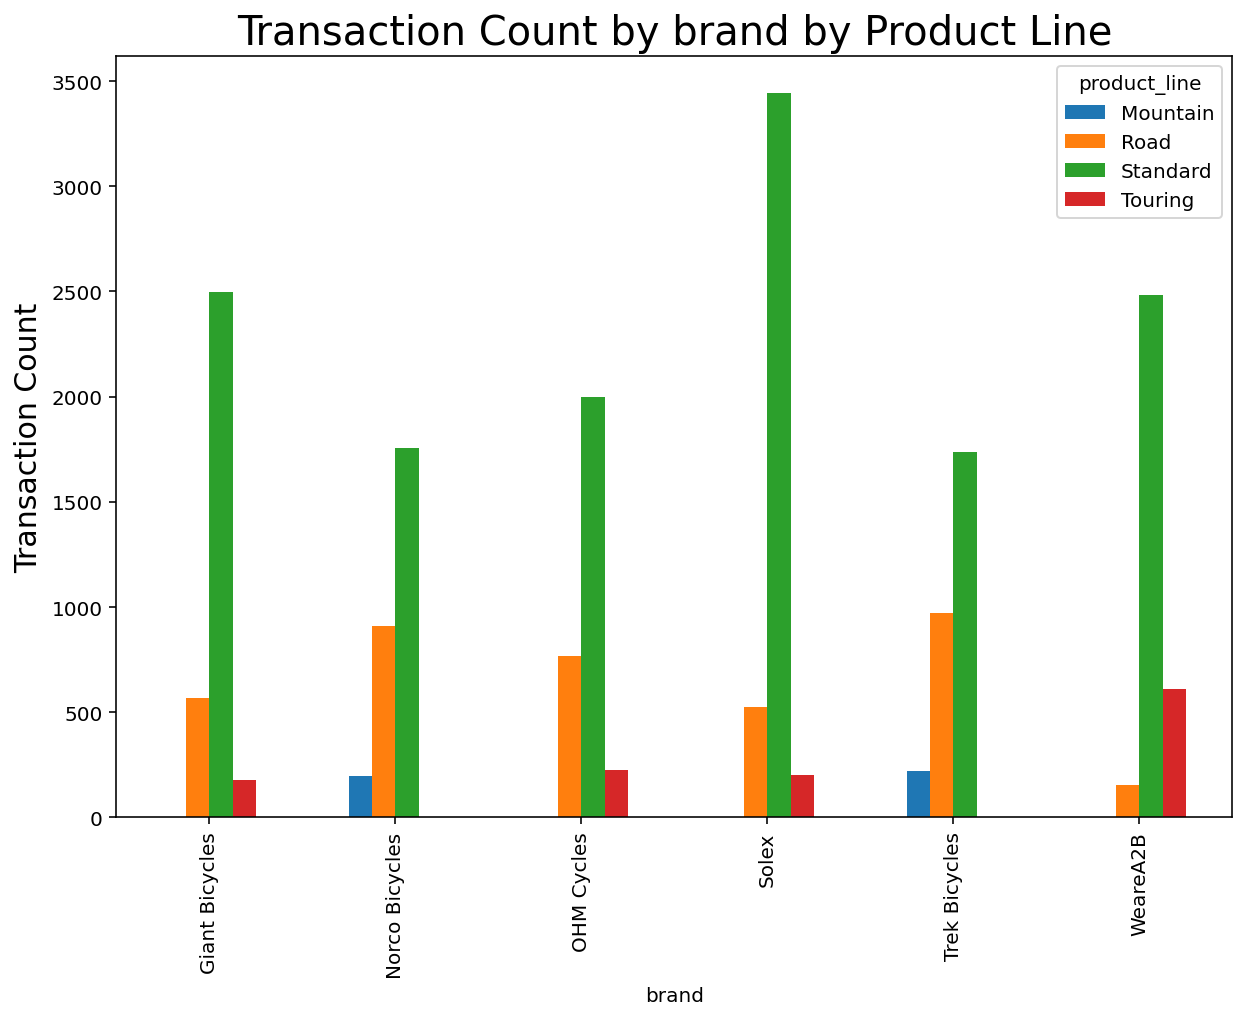

In [89]:

trans1.groupby(['brand','product_line']).count()['transaction_id'].unstack().plot.bar(figsize=(10,7));
plt.ylabel('Transaction Count', size=15)
plt.title('Transaction Count by brand by Product Line', size=20);

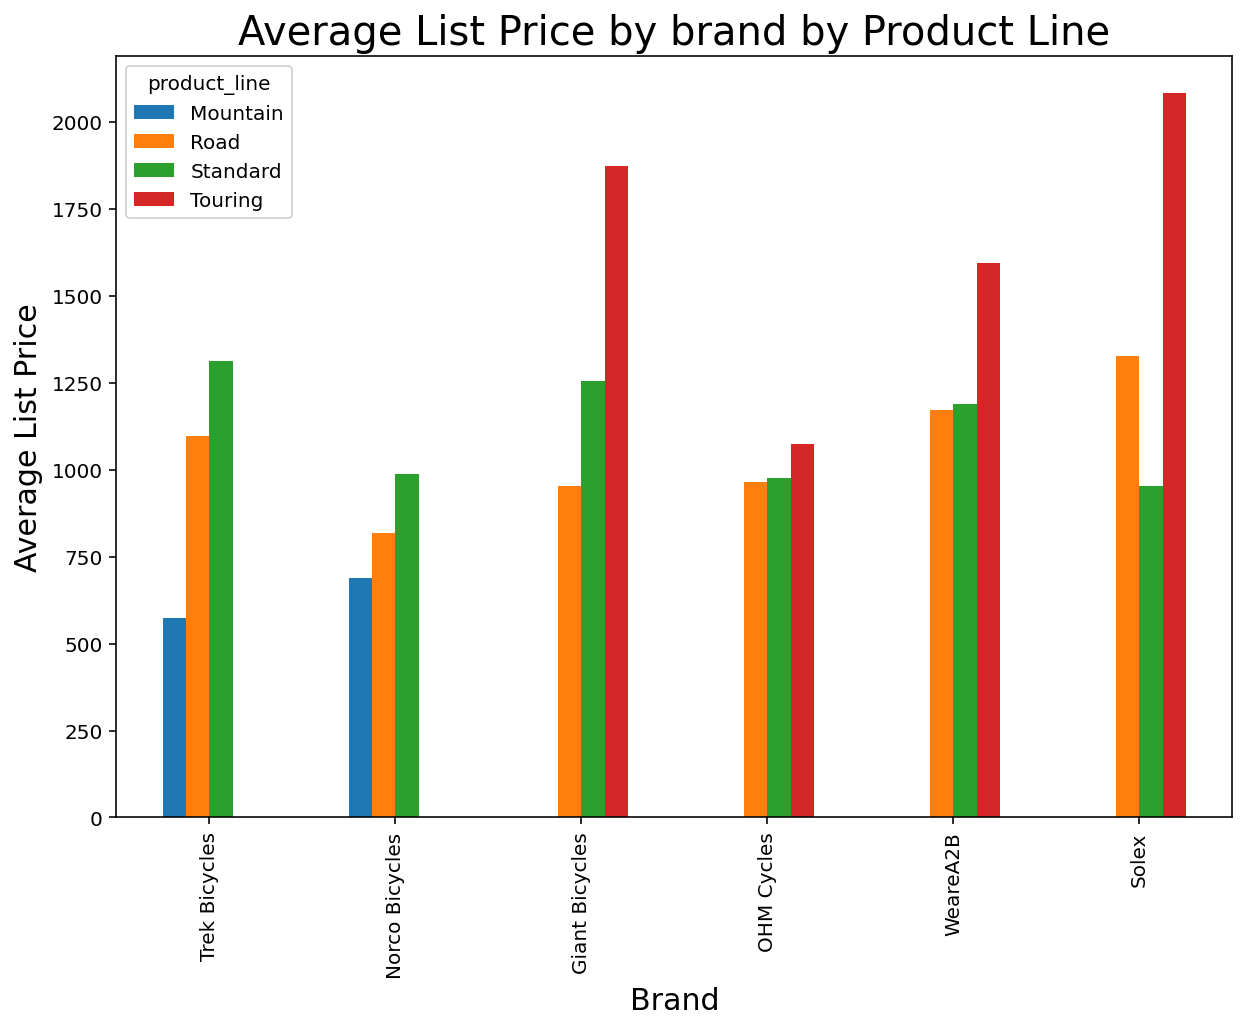

In [90]:
# List Price Breakdown

trans1.groupby(['brand','product_line']).mean()['list_price'].unstack().sort_values(by=['Mountain', 'Road', 'Standard', 'Touring']).plot.bar(figsize=(10,7));
plt.xlabel('Brand', size=15)
plt.ylabel('Average List Price', size=15)
plt.title('Average List Price by brand by Product Line', size=20);

In [91]:
trans1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


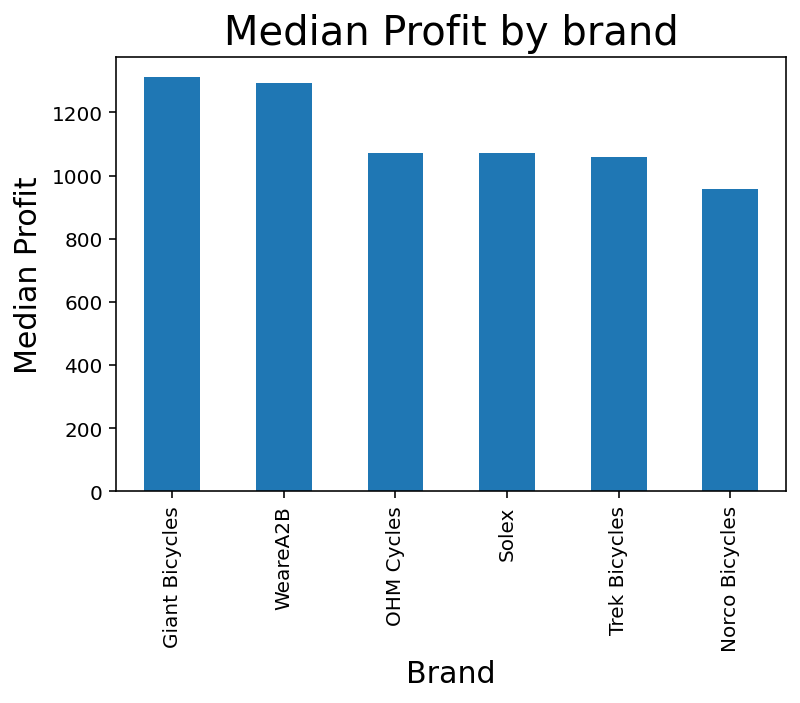

In [92]:
trans1.groupby('brand').median()['list_price'].sort_values(ascending=False).plot(kind='bar');
plt.xlabel('Brand', size=15)
plt.ylabel('Median Profit', size=15)
plt.title('Median Profit by brand', size=20);

In [93]:
trans1['profit'] = trans1['list_price'] - trans1['standard_cost']

In [94]:
trans1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


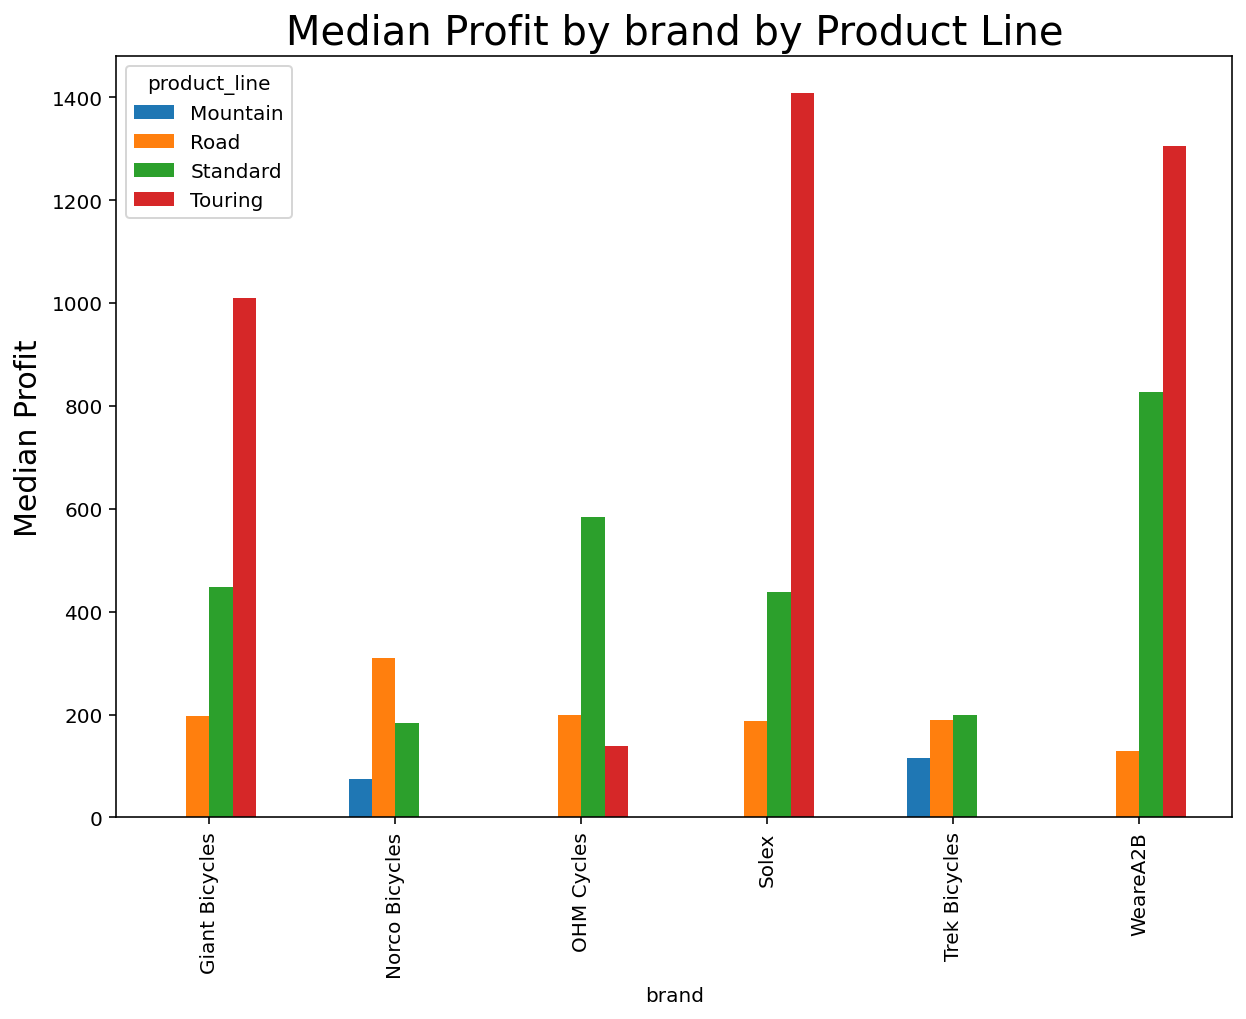

In [95]:
trans1.groupby(['brand','product_line']).median()['profit'].unstack().plot(kind='bar', figsize=(10,7));
plt.ylabel('Median Profit', size=15)
plt.title('Median Profit by brand by Product Line', size=20);

In [97]:
tr

NameError: name 'tr' is not defined

In [ ]:
def timestamp_to_date(timestamp):
    datetime_date = xlrd.xldate_as_datetime(timestamp, 0)
    date_object = datetime_date.date()
    string_date = date_object.isoformat()
    return date_object

type(timestamp_to_date(41245))

In [ ]:
trans1['pfsd'] = trans1['product_first_sold_date'].apply(timestamp_to_date)

In [ ]:
trans1.dtypes

### 3.2 Clean Customer Demographic Dataset

In [98]:
cust_demograph.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [99]:
def clean_demographics(df):
    
    # Clean Gender column
    df['gender'].replace({'Female':'F', 'Male':'M', 'Femal':'F'}, inplace=True)
    
    # Clean Job title
    df['job_title'] = df['job_title'].str.replace(' V','').str.replace(' IV','').str.replace(' III','')
    df['job_title'] = df['job_title'].str.replace(' II','').str.replace(' I','')
    
    df.drop(columns=['default'], inplace=True)
    return df
    

In [100]:
trial = cust_demograph.copy()

In [101]:
cc = clean_demographics(trial)
cc

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,F,87,2001-07-13,Statistician,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,M,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [102]:
cc['job_title'].value_counts()[0:20]

Computer Systems Analyst                47
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
Legal Assistant                         41
General Manager                         40
Safety Technician                       39
Software Test Engineer                  39
Associate Professor                     39
Structural Engineer                     39
Desktop Support Technician              38
Junior Executive                        38
Statistician                            38
Sales Representative                    38
Dental Hygienist                        37
Senior Financial Analyst                37
Chemical Engineer                       37
Accountant                              37
Name: job_title, dtype: int64

In [103]:
cust_demograph['job_title'].value_counts()[0:20]

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
Recruiting Manager                      41
General Manager                         40
Structural Engineer                     39
Associate Professor                     39
Junior Executive                        38
Desktop Support Technician              38
Sales Representative                    38
Technical Writer                        37
Executive Secretary                     37
Dental Hygienist                        37
Senior Financial Analyst                37
Chemical Engineer                       37
Registered Nurse                        36
Assistant Professor                     36
Cost Accountant                         36
Name: job_title, dtype: int64

<AxesSubplot:>

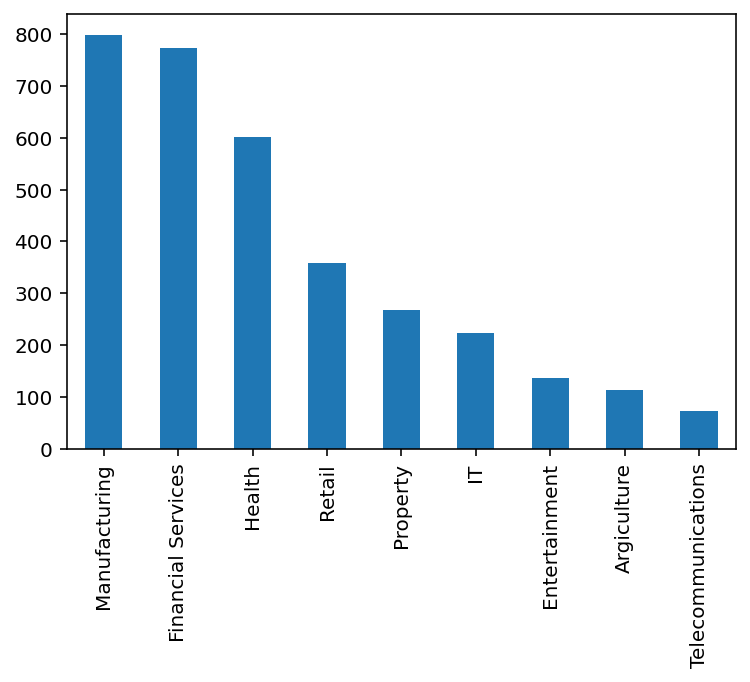

In [104]:
cc['job_industry_category'].value_counts().plot(kind='bar')

In [105]:
cc.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [106]:
cc.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [107]:
cc2 = cc.dropna()
cc2.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [108]:
print(cc2.shape)
print(cc.shape)

(2780, 12)
(4000, 12)


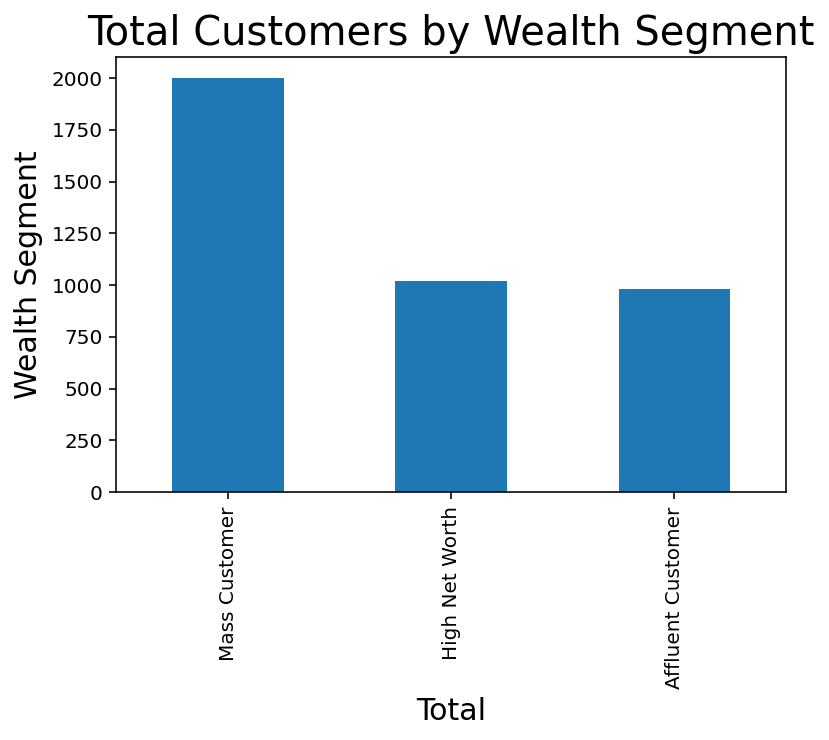

In [109]:
cc['wealth_segment'].value_counts().plot(kind='bar', stacked=True);
plt.xlabel('Total', size=15)
plt.ylabel('Wealth Segment', size=15)
plt.title('Total Customers by Wealth Segment', size=20);

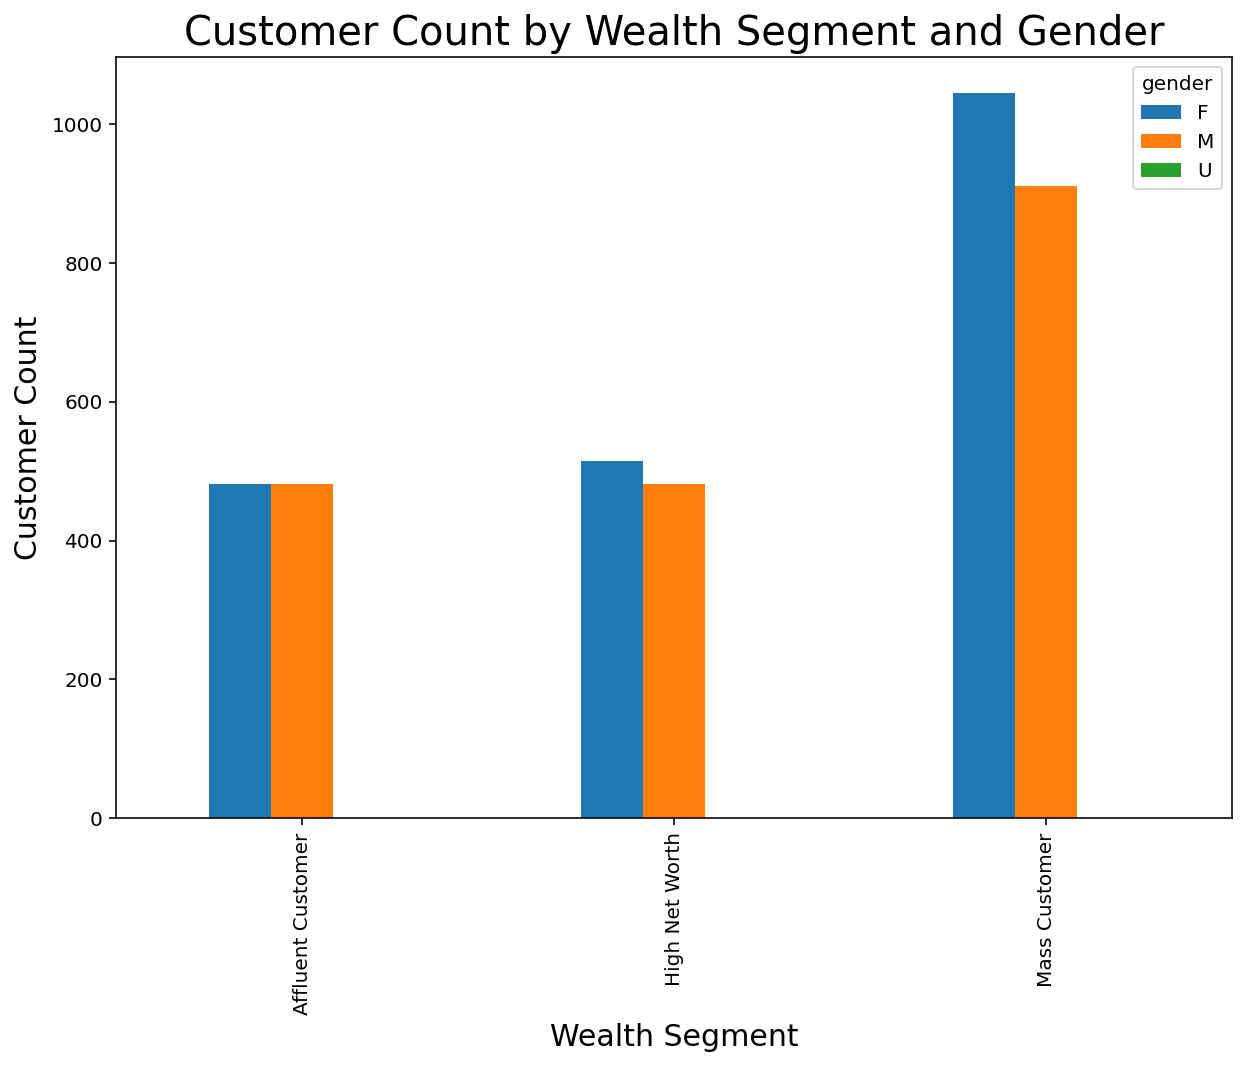

In [110]:
cc.groupby(['wealth_segment','gender']).count()['tenure'].unstack().plot(kind='bar', figsize=(10,7));
plt.xlabel('Wealth Segment', size=15)
plt.ylabel('Customer Count', size=15)
plt.title('Customer Count by Wealth Segment and Gender', size=20);

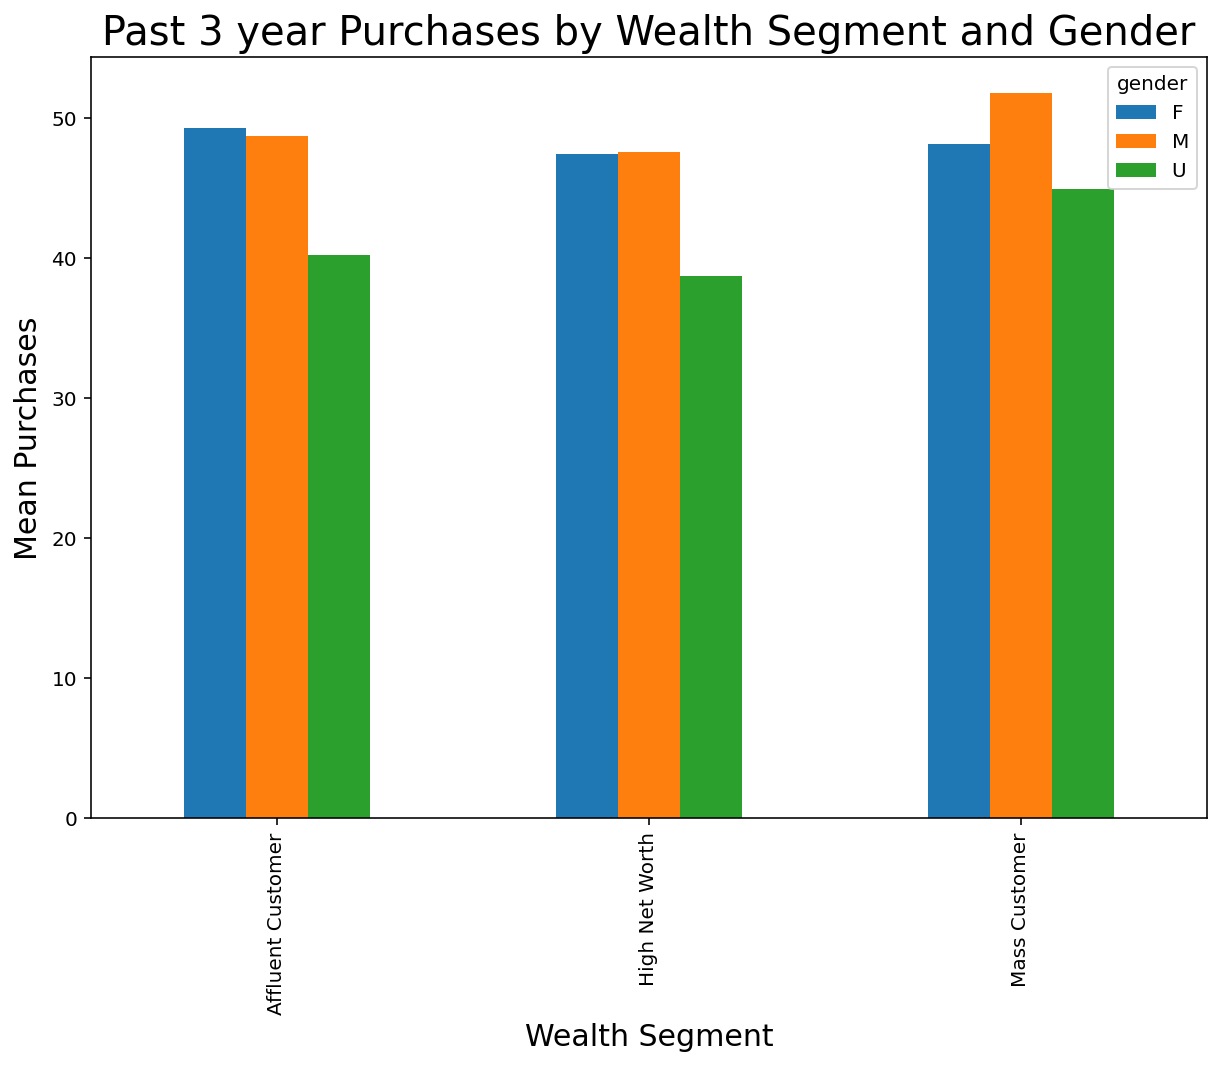

In [111]:
cc.groupby(['wealth_segment','gender']).mean()['past_3_years_bike_related_purchases'].unstack().plot(kind='bar', figsize=(10,7));
plt.xlabel('Wealth Segment', size=15)
plt.ylabel('Mean Purchases', size=15)
plt.title('Past 3 year Purchases by Wealth Segment and Gender', size=20);

### 3.3 Clean Customer Address Dataset

In [112]:
cust_address['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [113]:
def clean_address(df):
    
    df['state'] = df['state'].replace({'New South Wales':'NSW','Victoria':'VIC'})
    
    df.drop(columns=['country'], inplace=True)
    return df

In [114]:
ca = cust_address.copy()

In [115]:
ca = clean_address(ca)

In [116]:
ca.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


In [117]:
ca.shape

(3999, 5)

In [118]:
customer_joined = cc.merge(ca, left_on='customer_id' ,right_on='customer_id')

## 4. Join All Datasets

In [119]:
final_df = trans1.merge(customer_joined, left_on='customer_id', right_on='customer_id')
final_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Software Engineer,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Software Engineer,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,5


In [120]:
print(final_df.shape)
final_df.isna().sum()

(19416, 29)


transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
first_name                                0
last_name                               626
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                     430
job_title                              2302
job_industry_category                  3129
wealth_segment                            0
deceased_indicator              

In [121]:
full_df = final_df.dropna()
print(full_df.shape)

(13636, 29)


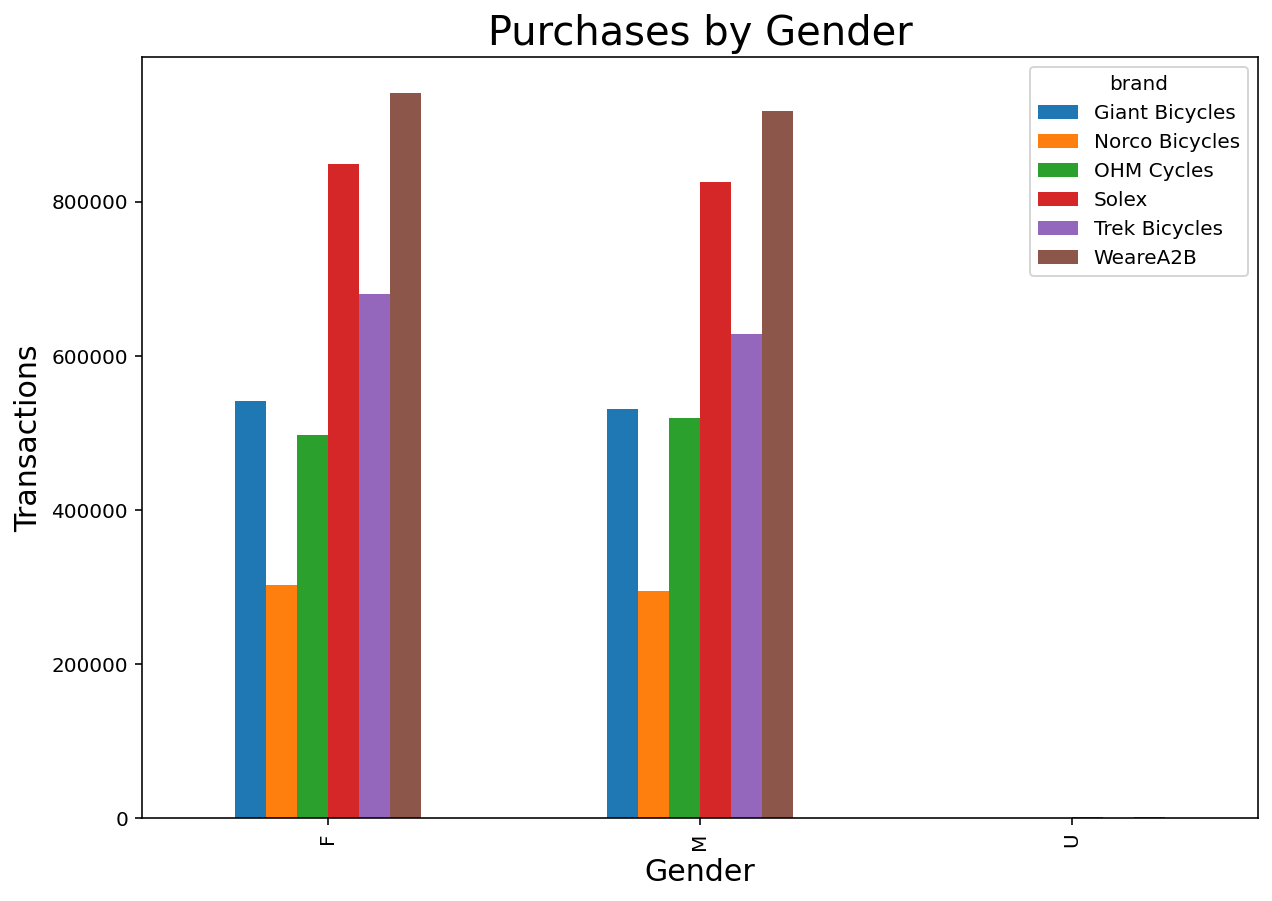

In [122]:
full_df.groupby(['gender','brand']).sum()['profit'].unstack().plot(kind='bar', figsize=(10,7));
plt.xlabel('Gender', size=15)
plt.ylabel('Transactions', size=15)
plt.title('Purchases by Gender', size=20);

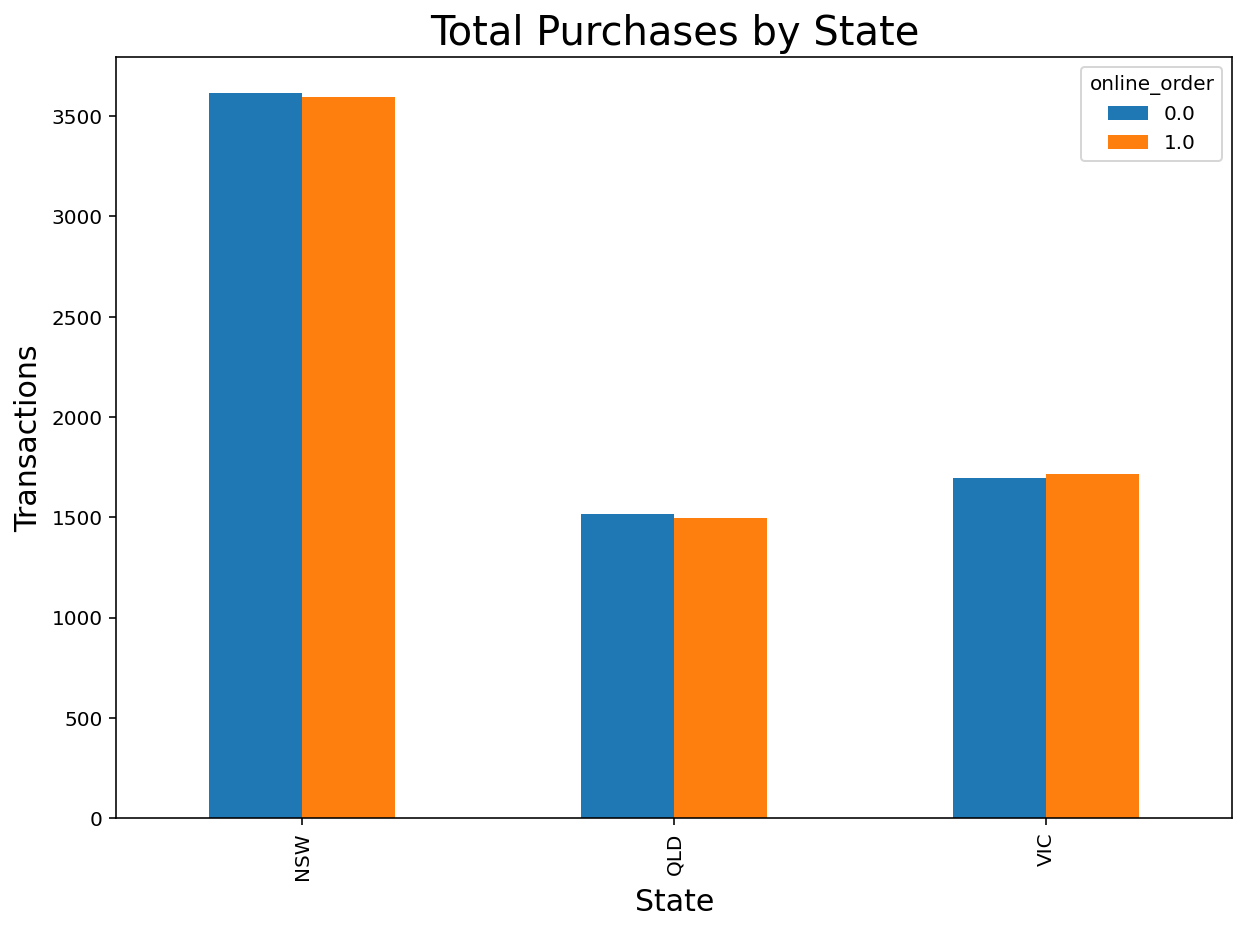

In [123]:
full_df.groupby(['state','online_order']).count()['list_price'].unstack().plot(kind='bar', figsize=(10,7));
plt.xlabel('State', size=15)
plt.ylabel('Transactions', size=15)
plt.title('Total Purchases by State', size=20);

## RFM Model

In [124]:
trans1.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
profit                            float64
dtype: object

In [125]:
RFM = full_df.groupby('customer_id').agg({'transaction_date': lambda y: full_df['transaction_date'].max().to_pydatetime().day - y.max().to_pydatetime().day,
                                          'transaction_id': lambda y: len(y.unique()),
                                          'list_price': lambda y: round(y.sum(), 2)})

RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM = RFM.sort_values('Monetary', ascending=False)
RFM.head()

,Recency,Frequency,Monetary
customer_id,,,
2183,8,14,19071.32
941,3,10,17898.46
2788,14,11,17258.94
1302,29,13,17035.83
1597,25,11,16245.23


In [126]:
# We will use the 80% quantile for each feature
quantiles = RFM.quantile(q=[0.8])
print(quantiles)
RFM['R']=np.where(RFM['Recency']<=int(quantiles.Recency.values), 2, 1)
RFM['F']=np.where(RFM['Frequency']>=int(quantiles.Frequency.values), 2, 1)
RFM['M']=np.where(RFM['Monetary']>=int(quantiles.Monetary.values), 2, 1)
RFM.head()

     Recency  Frequency  Monetary
0.8     22.0        7.0  8546.118


,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
2183,8,14,19071.32,2,2,2
941,3,10,17898.46,2,2,2
2788,14,11,17258.94,2,2,2
1302,29,13,17035.83,1,2,2
1597,25,11,16245.23,1,2,2


In [127]:
# To do the 2 x 2 matrix we will only use Recency & Monetary
RFM['RMScore'] = RFM.M.map(str)+RFM.R.map(str)
RFM = RFM.reset_index()
df_RFM_SUM = RFM.groupby('RMScore').agg({'customer_id': lambda y: len(y.unique()),
                                         'Frequency': lambda y: round(y.mean(),0),
                                         'Recency': lambda y: round(y.mean(),0),
                                         'R': lambda y: round(y.mean(),0),
                                         'M': lambda y: round(y.mean(),0),
                                         'Monetary': lambda y: round(y.mean(),0)})
df_RFM_SUM = df_RFM_SUM.sort_values('RMScore', ascending=False)
df_RFM_SUM.head()

,customer_id,Frequency,Recency,R,M,Monetary
RMScore,,,,,,
22,397,8,10,2,2,10521.0
21,93,9,26,1,2,10927.0
12,1593,5,11,2,1,5101.0
11,364,5,26,1,1,5003.0


#### Visualize value matrix and explore key numbers

In [128]:
# 1) Average Monetary Matrix
df_RFM_M = df_RFM_SUM.pivot(index='M', columns='R', values='Monetary')
df_RFM_M= df_RFM_M.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_M


R,1,2
M,,
2,10927.0,10521.0
1,5003.0,5101.0


In [129]:
# 2) Number of Customer Matrix
df_RFM_C = df_RFM_SUM.pivot(index='M', columns='R', values='customer_id')
df_RFM_C= df_RFM_C.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_C


R,1,2
M,,
2,93,397
1,364,1593


In [130]:
# 3) Recency Matrix
df_RFM_R = df_RFM_SUM.pivot(index='M', columns='R', values='Recency')
df_RFM_R = df_RFM_R.reset_index().sort_values(['M'], ascending = False).set_index(['M'])
df_RFM_R


R,1,2
M,,
2,26,10
1,26,11


In [131]:
len(full_df['customer_id'].unique())

2447

In [132]:
RFM.describe()

,customer_id,Recency,Frequency,Monetary,R,F,M
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,1726.167552,13.330609,5.572538,6187.592628,1.813241,1.315488,1.200245
std,1007.184867,8.520322,2.273499,2926.883197,0.389798,0.464805,0.400266
min,1.000000,-1.000000,1.000000,60.340000,1.000000,1.000000,1.000000
25%,846.500000,6.000000,4.000000,4092.905000,2.000000,1.000000,1.000000
50%,1722.000000,13.000000,5.000000,5883.750000,2.000000,1.000000,1.000000
75%,2592.500000,20.000000,7.000000,8004.325000,2.000000,2.000000,1.000000
max,3497.000000,29.000000,14.000000,19071.320000,2.000000,2.000000,2.000000


<AxesSubplot:ylabel='Frequency'>

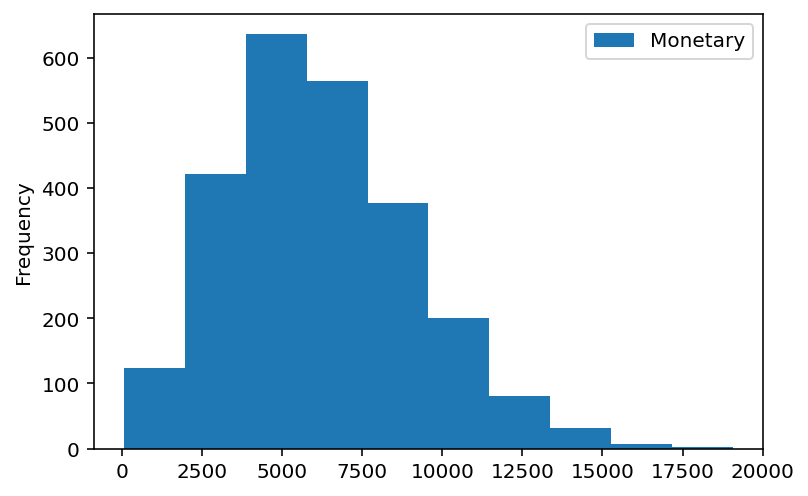

In [133]:
RFM.plot(kind='hist', y='Monetary')

## Clustering

In [134]:
X = RFM.loc[:, 'Recency':'Monetary']
X.head()

,Recency,Frequency,Monetary
0,8,14,19071.32
1,3,10,17898.46
2,14,11,17258.94
3,29,13,17035.83
4,25,11,16245.23


In [135]:
X = X[['Recency','Monetary']]
X.head()

,Recency,Monetary
0,8,19071.32
1,3,17898.46
2,14,17258.94
3,29,17035.83
4,25,16245.23


In [136]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=6


# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)


# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)


# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)


# Append clusters to input features table
Xstd['clusters'] = cluster_labels


Xstd.head()

Assigned cluster labels: 
 [1 1 1 ... 0 0 0]
Location of centroids: 
[[ 1.07483072 -0.80184067]
 [-0.63728011  1.64364209]
 [-0.7828973  -1.01193585]
 [ 1.21688877  1.02619408]
 [ 0.12257064  0.07183991]
 [-1.12556544  0.19596867]]


,Recency,Monetary,clusters
0,-0.625763,4.402759,1
1,-1.212715,4.001957,1
2,0.078580,3.783414,1
3,1.839437,3.707170,3
4,1.369875,3.436998,3


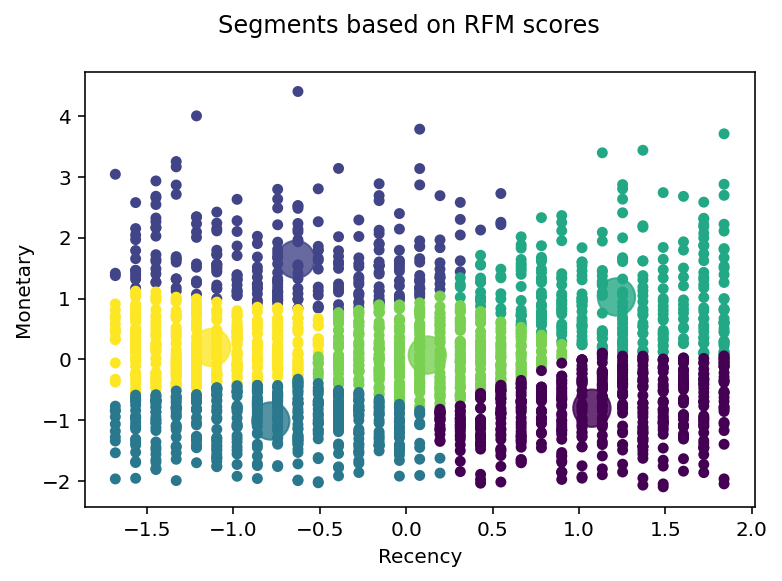

In [137]:
# Scatter plot of data coloured by cluster they belong to
#fig, (ax4, ax5, ax6) = plt.subplots(3);
fig, (ax5) = plt.subplots(1);
fig.suptitle('Segments based on RFM scores');

#Xstd.plot.scatter(x = 'Recency', y = 'Frequency', c=Xstd['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
#ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
#            cmap='viridis');

Xstd.plot.scatter(x = 'Recency', y = 'Monetary', c=Xstd['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k), 
            cmap='viridis');

#Xstd.plot.scatter(x = 'Frequency', y = 'Monetary', c=Xstd['clusters'], colormap='viridis', ax=ax6, colorbar=False);
#ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k), 
            #cmap='viridis');

In [138]:
from sklearn import metrics
metrics.silhouette_score(Xstd, cluster_labels, metric='euclidean')

0.622194679904224

In [139]:
inertias = []
ss = []

for k in range(2,11):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(Xstd)
    inertias.append(kmeans.inertia_)
    ss.append(metrics.silhouette_score(Xstd, kmeans.labels_, metric='euclidean'))

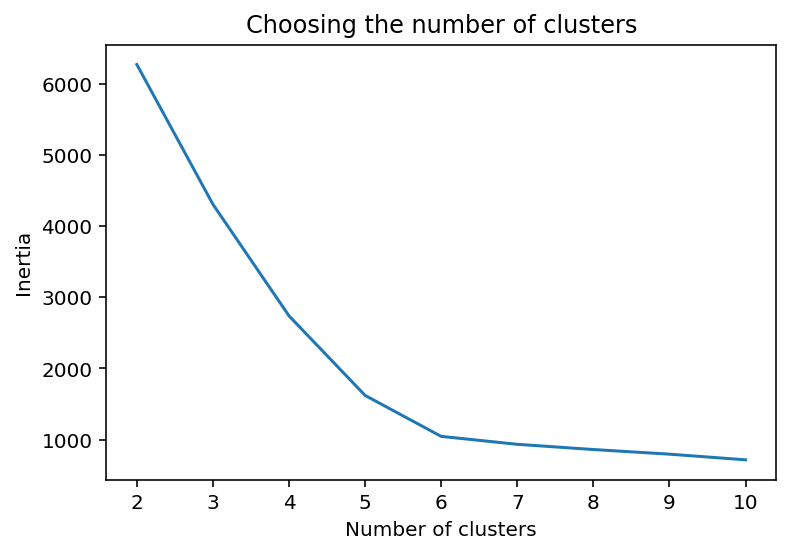

In [140]:
plt.plot(range(2, 11), inertias)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

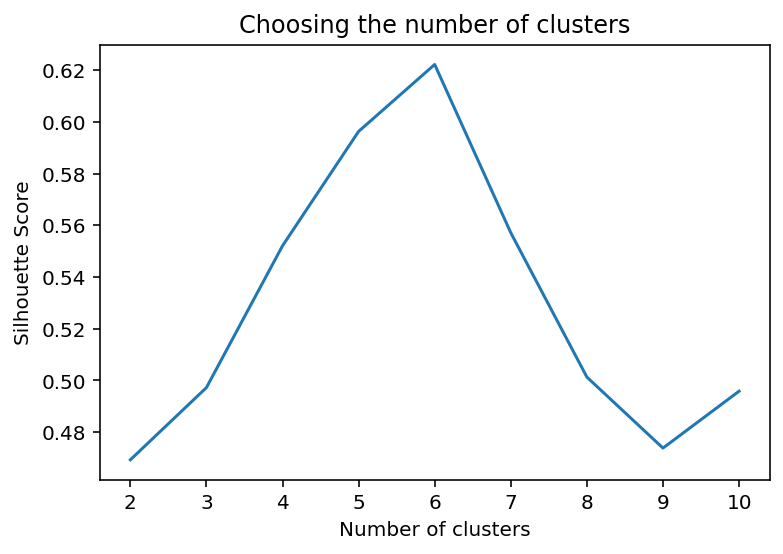

In [141]:
plt.plot(range(2, 11), ss)
plt.title('Choosing the number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [142]:
Xstd['clusters'].value_counts()

0    525
4    475
2    445
5    428
3    309
1    265
Name: clusters, dtype: int64

In [143]:
cust_address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [144]:
cust_demograph.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [145]:
transactions.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date    datetime64[ns]
online_order               float64
                         ...      
Unnamed: 251               float64
Unnamed: 252               float64
Unnamed: 253               float64
Unnamed: 254               float64
Unnamed: 255               float64
Length: 254, dtype: object

In [146]:
RFM2 = RFM.copy()
RFM2['cluster'] = cluster_labels
RFM2.cluster.unique()

array([1, 3, 5, 4, 0, 2], dtype=int32)

In [147]:
RFM2['segment'] = cluster_labels
RFM2['segment'].replace({0: "Lowest Value", 1: "Highest Value", 2: "High Potential", 3: "Disengaged"}, inplace = True)
RFM2.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RMScore,cluster,segment
0,2183,8,14,19071.32,2,2,2,22,1,Highest Value
1,941,3,10,17898.46,2,2,2,22,1,Highest Value
2,2788,14,11,17258.94,2,2,2,22,1,Highest Value
3,1302,29,13,17035.83,1,2,2,21,3,Disengaged
4,1597,25,11,16245.23,1,2,2,21,3,Disengaged


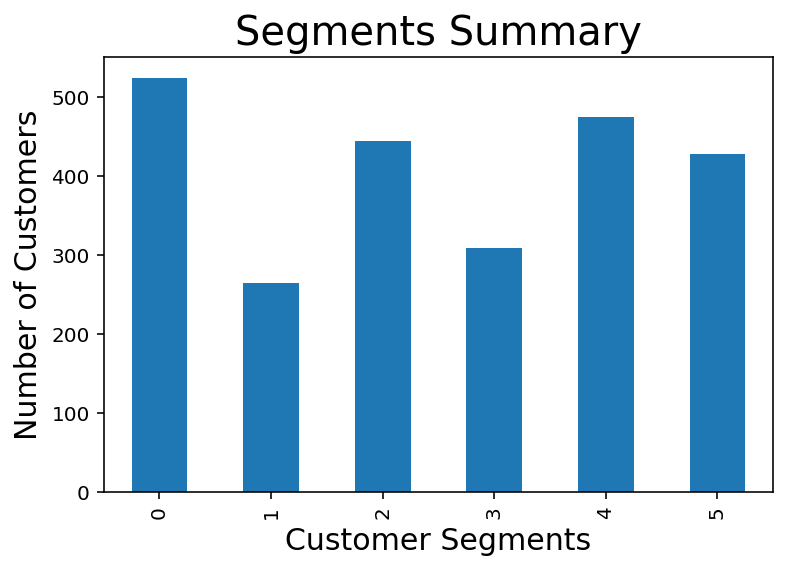

In [148]:
RFM2.groupby('cluster').cluster.count().plot.bar()
plt.xlabel("Customer Segments", size=15)
plt.ylabel("Number of Customers", size=15)
plt.title("Segments Summary", size=20);

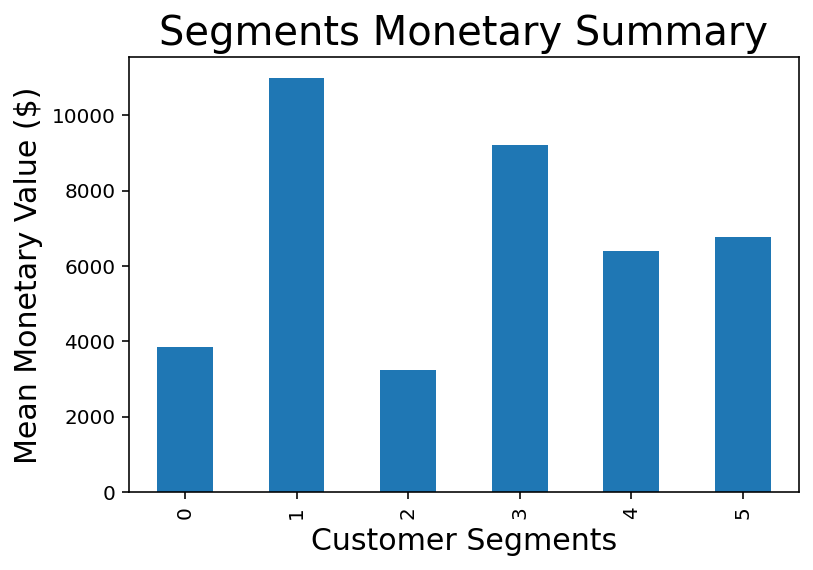

In [149]:
#RFM2.groupby('segment').Monetary.mean().plot.bar()
#plt.xlabel("Customer Segments", size=15)
#plt.ylabel("Mean Monetary Value ($)", size=15)
#plt.title("Segments Monetary Summary", size=20);

RFM2.groupby('cluster').Monetary.mean().plot.bar()
plt.xlabel("Customer Segments", size=15)
plt.ylabel("Mean Monetary Value ($)", size=15)
plt.title("Segments Monetary Summary", size=20);

In [150]:
last = RFM2[['customer_id','segment']]
last.head()

,customer_id,segment
0,2183,Highest Value
1,941,Highest Value
2,2788,Highest Value
3,1302,Disengaged
4,1597,Disengaged


In [151]:
final = full_df.merge(last, left_on='customer_id', right_on='customer_id',)

In [152]:
final.shape

(13636, 30)

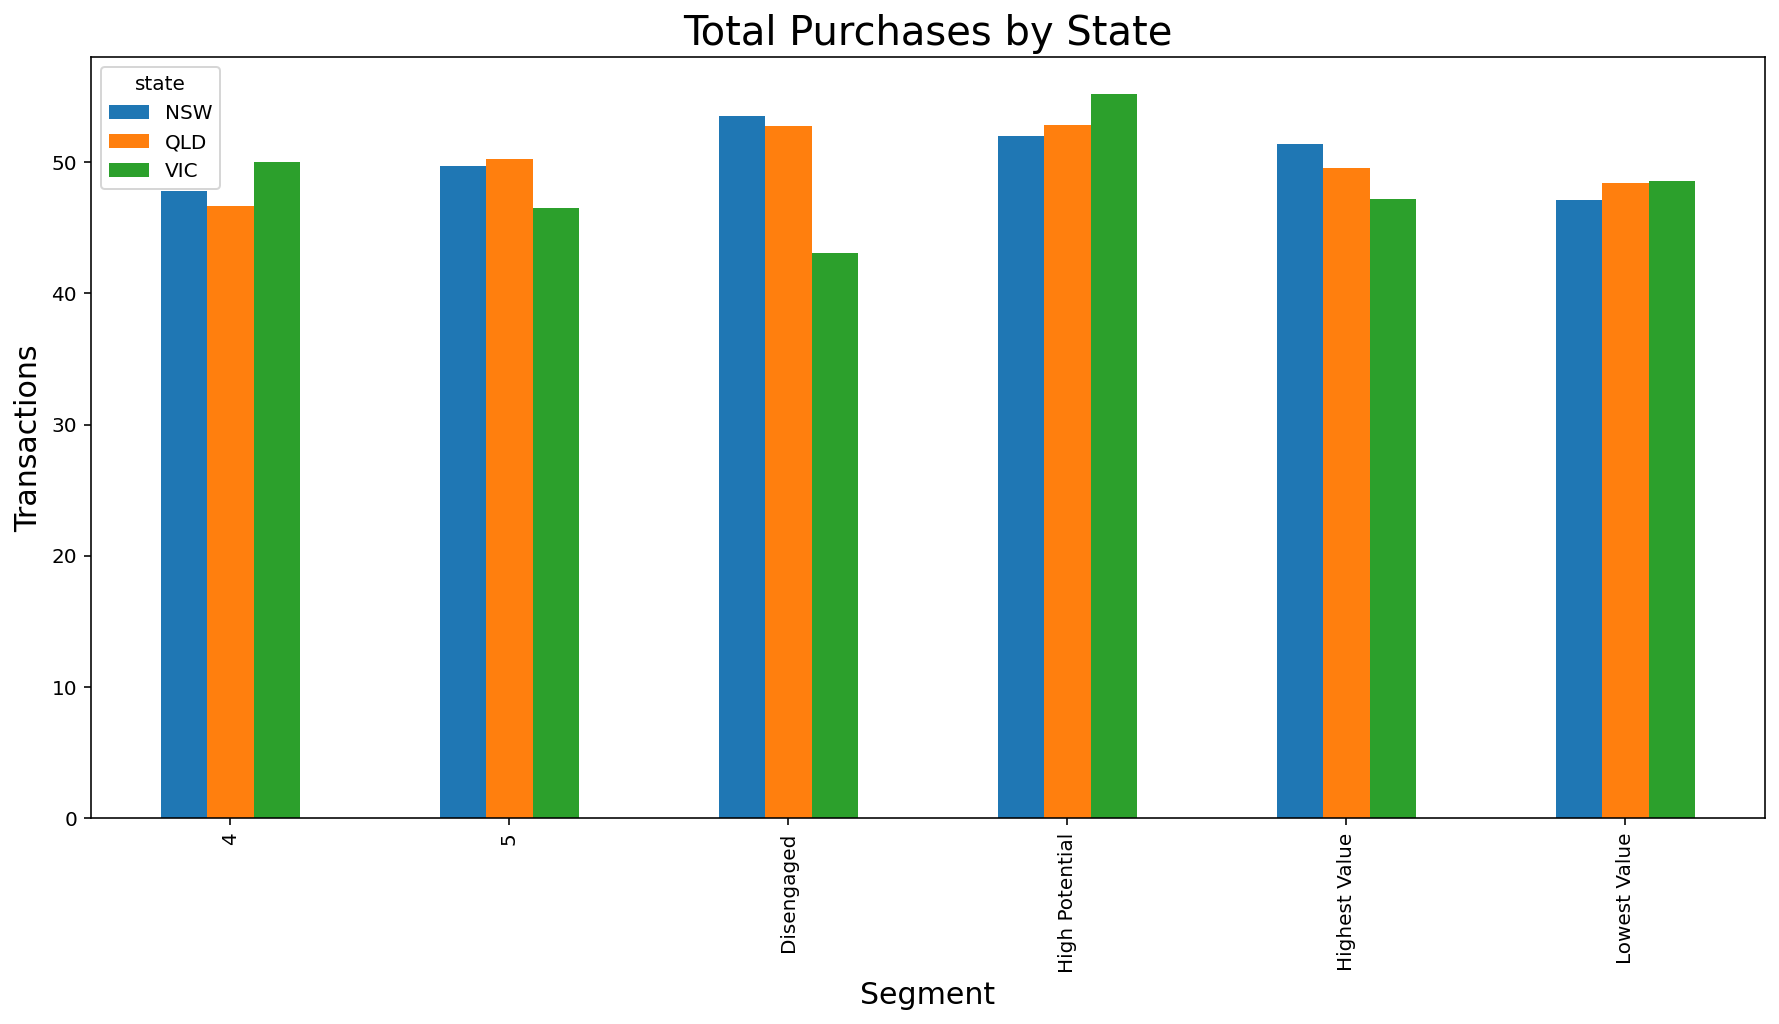

In [153]:
final.groupby(['segment','state']).mean()['past_3_years_bike_related_purchases'].unstack().plot(kind='bar', figsize=(15,7));
plt.xlabel('Segment', size=15)
plt.ylabel('Transactions', size=15)
plt.title('Total Purchases by State', size=20);

In [154]:
hv = final.loc[final['segment'] == 'Highest Value']
lv = final.loc[final['segment'] == 'Lowest Value']
dis = final.loc[final['segment'] == 'Disengaged']
hp = final.loc[final['segment'] == 'High Potential']

In [155]:
hv['property_valuation'].mean()

7.406317611423626

In [156]:
lv.groupby('postcode').count()['transaction_id'].sort_values()

postcode
2222     1
3147     1
3175     1
2650     1
2260     1
        ..
2170    19
2750    20
3337    23
2760    23
2145    26
Name: transaction_id, Length: 354, dtype: int64

In [157]:
hv.groupby('brand').count()['transaction_id']

brand
Giant Bicycles    404
Norco Bicycles    328
OHM Cycles        338
Solex             488
Trek Bicycles     395
WeareA2B          358
Name: transaction_id, dtype: int64

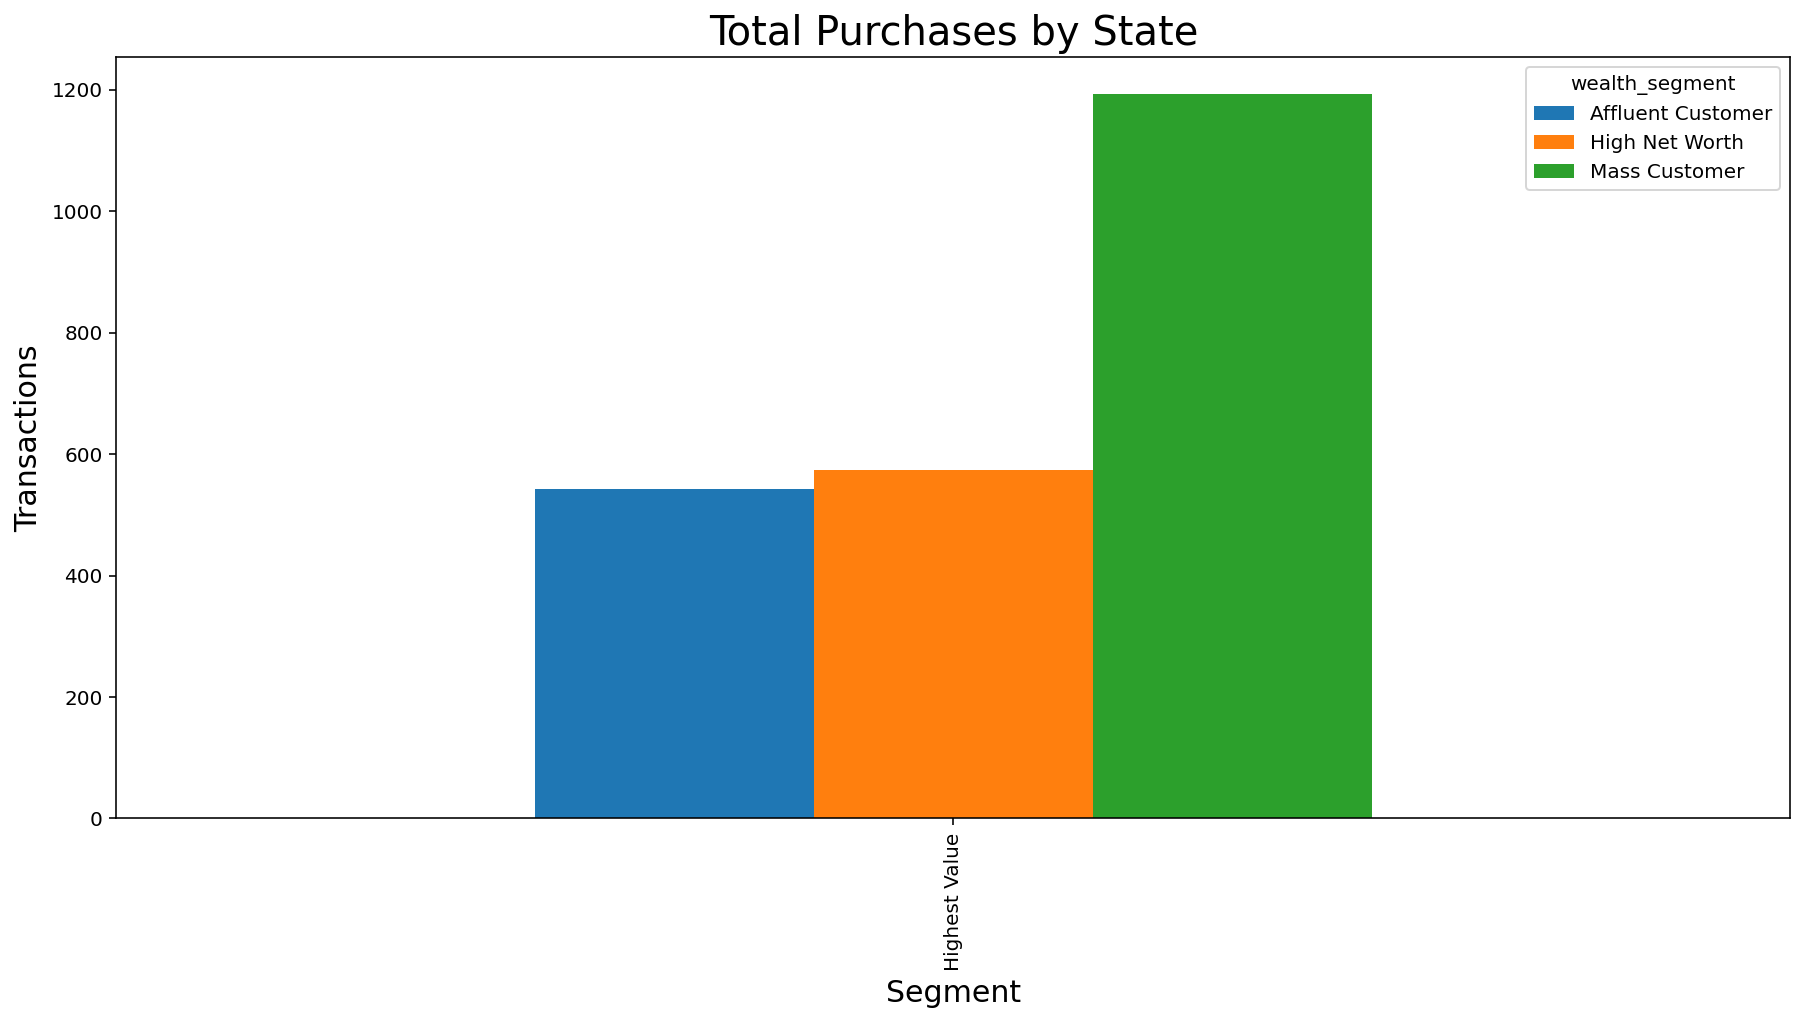

In [158]:
hv.groupby(['segment','wealth_segment']).count()['online_order'].unstack().plot(kind='bar', figsize=(15,7));
plt.xlabel('Segment', size=15)
plt.ylabel('Transactions', size=15)
plt.title('Total Purchases by State', size=20);